In [346]:
import h5py
import numpy as np
import arviz as az
import matplotlib.pyplot as plt
import matplotlib.patches as pt
import utility_functions
import meshio
import evaluations


In [347]:
point = np.array([80, 150])

start = 0
end = 10000
start_mlda = 0
end_mlda = 10000

sample_paths = [
    '/home/anne/Masterarbeit/masterarbeit/results/samples_2d_3_l0.h5',
    '/home/anne/Masterarbeit/masterarbeit/results/samples_2d_3_l1.h5',
    '/home/anne/Masterarbeit/masterarbeit/results/samples_2d_3_l2.h5']

samples = []

for i in range(len(sample_paths)):
    fin = h5py.File(sample_paths[i])
    samples.append(np.array( fin['/samples'][0:2] ))
    fin.close()

fin = h5py.File('/home/anne/Masterarbeit/masterarbeit/results/samples_2d_test_mlda.h5')
mlda_samples = np.array( fin['/samples'][0:2] )
fin.close()


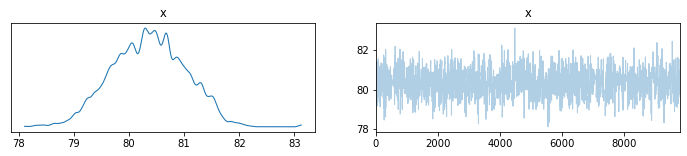

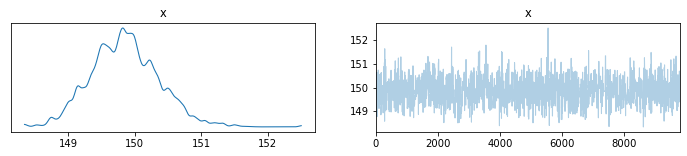

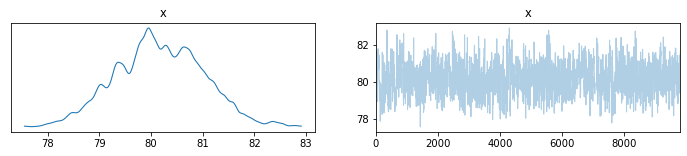

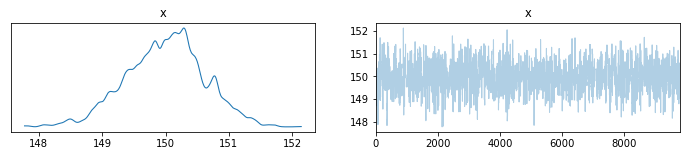

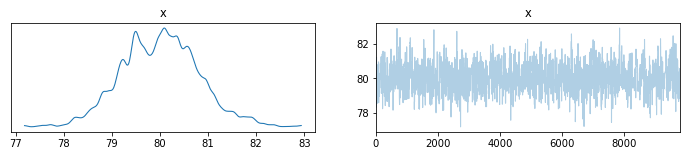

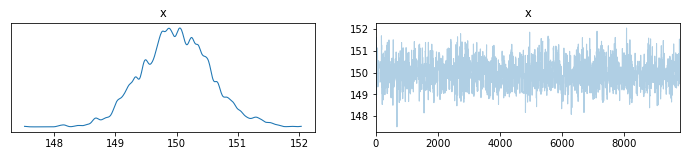

In [348]:
for i in range(len(sample_paths)):
    s = samples[i]
    az.plot_trace(s[0,start:end])
    az.plot_trace(s[1,start:end])

array([[<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'x'}>]], dtype=object)

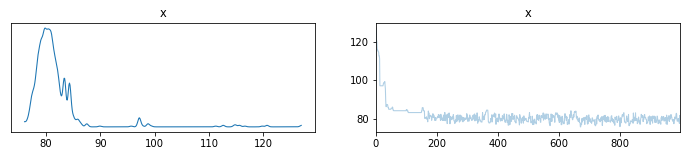

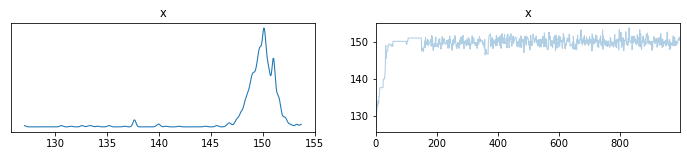

In [349]:
az.plot_trace(mlda_samples[0,start_mlda:])
az.plot_trace(mlda_samples[1,start_mlda:])

In [350]:
for i in range(len(sample_paths)):
    print("Level " + str(i) + ":")
    mean = np.mean(samples[i][:,start:end], axis=1)
    print("Mean = " + str(mean))
    #var = np.var(samples[i][:,start:end], axis=1)/end
    #print("Variance = " + str(var))
    print("DLE = "+ str(np.linalg.norm(mean-point)))
    print("\n")


print("MLDA :")
mean = np.mean(mlda_samples[:,start_mlda:end_mlda], axis=1)
print("Mean = " + str(mean))
print("DLE = "+ str(np.linalg.norm(mean-point)))


Level 0:
Mean = [ 80.35944157 149.85903668]
DLE = 0.38609441895062935


Level 1:
Mean = [ 80.17383467 149.99570564]
DLE = 0.17388770900145084


Level 2:
Mean = [ 80.0109806  149.99456543]
DLE = 0.01225186147071369


MLDA :
Mean = [ 81.47965086 149.51259101]
DLE = 1.5578620590174466


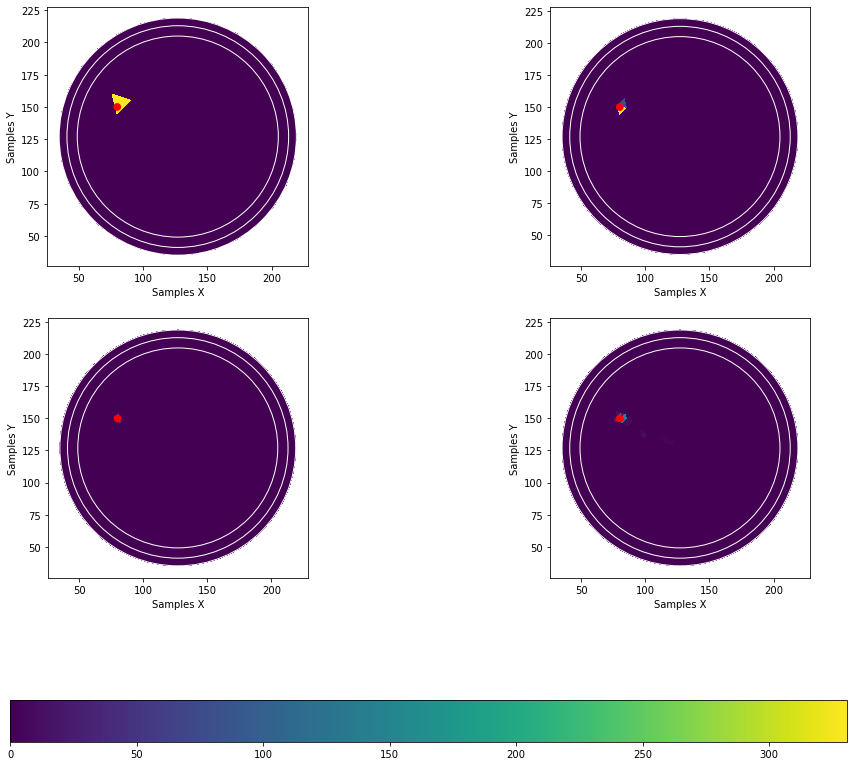

In [351]:
path_meshs = [
        "data/mesh_20_1.msh",
        "data/mesh_20_2.msh",
        "data/mesh_20_3.msh"]

fig, ax = plt.subplots(2, 2, figsize=(15,15))
fig.subplots_adjust(wspace=.5)

im = evaluations.draw_cells(path_meshs[0],samples[0][:,start:end],ax[0,0])
im = evaluations.draw_cells(path_meshs[1],samples[1][:,start:end],ax[0,1])
im = evaluations.draw_cells(path_meshs[2],samples[2][:,start:end],ax[1,0])
im = evaluations.draw_cells(path_meshs[2],mlda_samples[:,start_mlda:end_mlda],ax[1,1])

evaluations.set_ax(ax[0,0],point)
evaluations.set_ax(ax[0,1],point)
evaluations.set_ax(ax[1,0],point)
evaluations.set_ax(ax[1,1],point)

fig.colorbar(im, ax=ax.ravel().tolist(),orientation="horizontal")


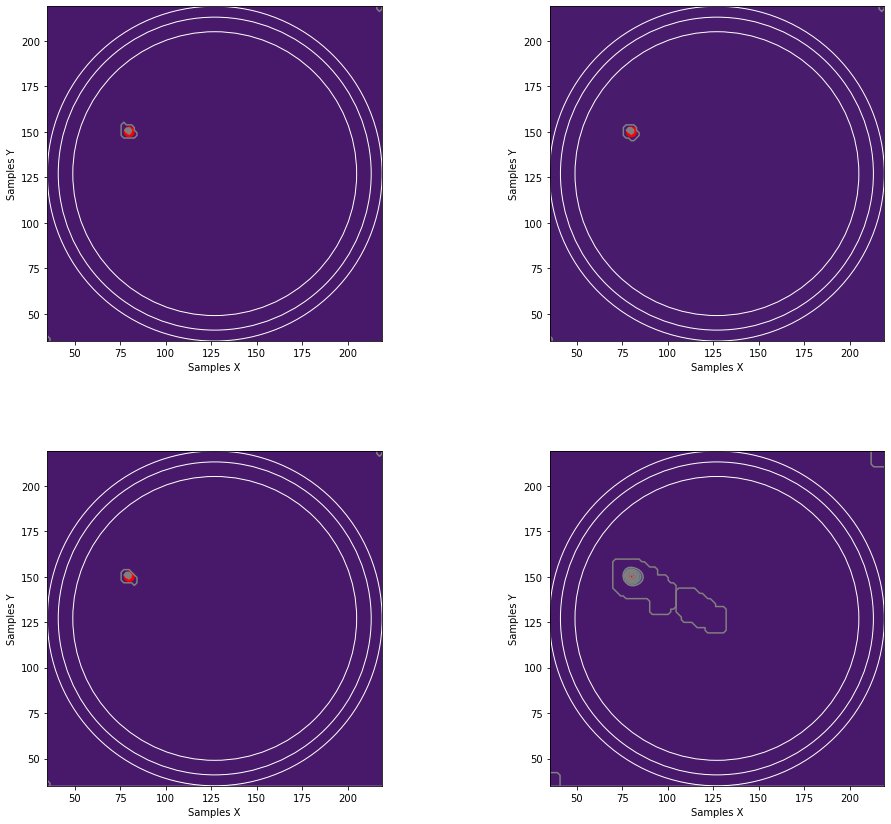

In [352]:
fig, ax = plt.subplots(2, 2, figsize=(15,15))
fig.subplots_adjust(wspace=.5)

im = evaluations.draw_densities(samples[0][:,start:end],ax[0,0])
im = evaluations.draw_densities(samples[1][:,start:end],ax[0,1])
im = evaluations.draw_densities(samples[2][:,start:end],ax[1,0])
im = evaluations.draw_densities(mlda_samples[:,start_mlda:end_mlda],ax[1,1])

#point = (80,150)
evaluations.set_ax(ax[0,0],point)
evaluations.set_ax(ax[0,1],point)
evaluations.set_ax(ax[1,0],point)
evaluations.set_ax(ax[1,1],point)

#fig.colorbar(im, ax=ax.ravel().tolist(),orientation="horizontal")


In [353]:
'''moments = []

for i in range(len(sample_paths)):
    fin = h5py.File(sample_paths[i])
    moments.append(np.array( fin['/samples'][2] ))
    fin.close()

data_labels = ["Level 1", "Level 2", "Level 3"]

az.plot_density(moments, data_labels=data_labels)

az.plot_trace(moments[0])
az.plot_trace(moments[1])
az.plot_trace(moments[2])'''

'moments = []\n\nfor i in range(len(sample_paths)):\n    fin = h5py.File(sample_paths[i])\n    moments.append(np.array( fin[\'/samples\'][2] ))\n    fin.close()\n\ndata_labels = ["Level 1", "Level 2", "Level 3"]\n\naz.plot_density(moments, data_labels=data_labels)\n\naz.plot_trace(moments[0])\naz.plot_trace(moments[1])\naz.plot_trace(moments[2])'

In [354]:
'''import utility_functions

samples = []

for i in range(len(sample_paths)):
    fin = h5py.File(sample_paths[i])
    samples.append(np.array( fin['/samples']))
    fin.close()
    
fig, ax = plt.subplots()

x = samples[0][0]
y = samples[0][1]
u = []
v = []
for i in range(len(samples[0][0])):
    d = utility_functions.get_dipole_orientation(2,samples[0][2][i])
    u.append(d[0])
    v.append(d[1])
    
q = ax.quiver(x, y, u, v)
plt.show()'''

"import utility_functions\n\nsamples = []\n\nfor i in range(len(sample_paths)):\n    fin = h5py.File(sample_paths[i])\n    samples.append(np.array( fin['/samples']))\n    fin.close()\n    \nfig, ax = plt.subplots()\n\nx = samples[0][0]\ny = samples[0][1]\nu = []\nv = []\nfor i in range(len(samples[0][0])):\n    d = utility_functions.get_dipole_orientation(2,samples[0][2][i])\n    u.append(d[0])\n    v.append(d[1])\n    \nq = ax.quiver(x, y, u, v)\nplt.show()"